# Custom Dataset 

Custom dataset is a collection of data relating to a specific problem you're working on 

In 

## Import


In [3]:
import torch
import torchvision
import torchmetrics 
import requests
import matplotlib.pyplot as plt 
import numpy 
import zipfile


from pathlib import Path
from torch import nn 



In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

## Get our dataset 

In [5]:
def download_and_extract_zip(url: str, download_dir: Path, zip_filename: str, extract_to: str):
    """
    Downloads a ZIP file from the given URL and extracts it.

    Args:
        url (str): URL to the ZIP file.
        download_dir (Path): Path object where ZIP file will be saved and data extracted.
        zip_filename (str): Name of the ZIP file to save.
        extract_to (str): Name of the directory to extract contents into (relative to download_dir).
    """
    download_dir.mkdir(parents=True, exist_ok=True)

    zip_path = download_dir / zip_filename
    extract_path = download_dir / extract_to

    print(f"Downloading ZIP file from {url}...")
    response = requests.get(url)
    zip_path.write_bytes(response.content)

    print(f"Extracting to {extract_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(path=extract_path)
    
    try:
        zip_path.unlink()
        print("ZIP file deleted.")
    except Exception as e:
        print(f"Failed to delete ZIP file: {e}")

    print("Download and extraction complete.")





In [6]:
URL = "https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi_20_percent.zip"
PATH = Path("../Data")
ZIP = "custom_data.zip"
IMAGE = "piza_sushi"

download_and_extract_zip(URL, PATH, ZIP, IMAGE)


Extracting to ../Data/piza_sushi...
ZIP file deleted.
Download and extraction complete.


## Preparing the dataset

In [7]:
!nvidia-smi


Sat May 24 17:27:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       On  |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Our dataset is a subset of [food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) this dataset    
has 101 different classes and there are 750 images per class 

We will be using a subset of this dataset with 3 class with 10% of the data 



## Becoming one with the data 

In [8]:
import os 
def walk_dir(dir_path:Path):
    """Give a info about the dir """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [9]:
dir_path = Path('../Data/piza_sushi')
walk_dir(dir_path)


There are 2 directories and 0 images in '../Data/piza_sushi'
There are 3 directories and 0 images in '../Data/piza_sushi/test'
There are 0 directories and 46 images in '../Data/piza_sushi/test/sushi'
There are 0 directories and 58 images in '../Data/piza_sushi/test/steak'
There are 0 directories and 46 images in '../Data/piza_sushi/test/pizza'
There are 3 directories and 0 images in '../Data/piza_sushi/train'
There are 0 directories and 150 images in '../Data/piza_sushi/train/sushi'
There are 0 directories and 146 images in '../Data/piza_sushi/train/steak'
There are 0 directories and 154 images in '../Data/piza_sushi/train/pizza'


Image path: ../Data/piza_sushi/test/sushi/3365273.jpg
Image class: sushi
Image width: 512
Image height: 288


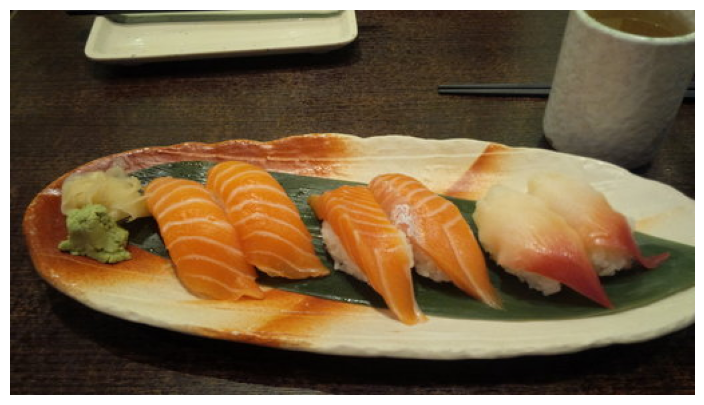

In [42]:
# visualizing image 

# get all of the image path 
# get a random path of the image using random.choice
# get the image class name using pathlib.path.parent.stem
# Open the image using PIL - python.pillow 
# show the image and print some metadata

import random 
from PIL import Image

# random.seed(42)

image_path = Path('../Data/piza_sushi')

image_path_list = list(image_path.glob('*/*/*.jpg'))

random_image_path = random.choice(image_path_list)


image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image width: {img.width}")
print(f"Image height: {img.height}")

plt.figure(figsize=(10, 5))
plt.axis(False)
plt.imshow(img);


## Transforming Data

In [43]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [45]:
data_transform = transforms.Compose([
    # resize the all the image into same height and width 
    transforms.Resize((64, 64)),

    # flip some of the images 
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a tensor
    transforms.ToTensor()

])


In [46]:
test_transformed_image = data_transform(img)
test_transformed_image.shape


torch.Size([3, 64, 64])

In [51]:
# A function to show transformed image alongside original image 

def plot_transformed_images(image_path:Path, transforms:torchvision.transforms, n=3, seed=42 ):
    random.seed(seed)
    random_image_paths = random.sample(image_path, k=3)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transforms(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)




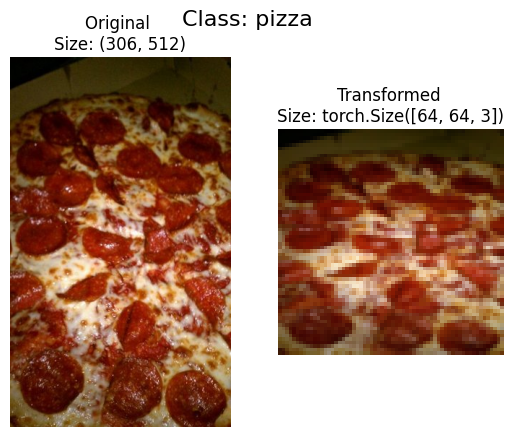

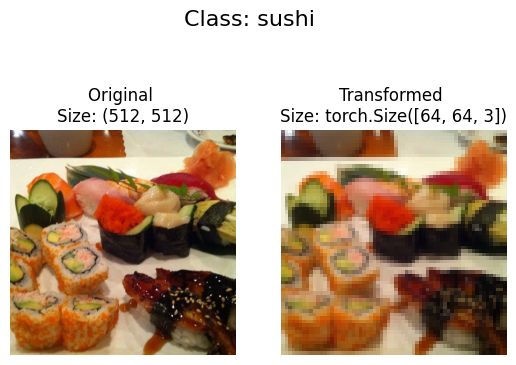

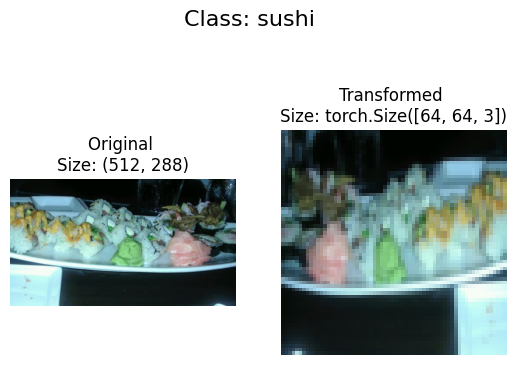

In [52]:
plot_transformed_images(image_path_list, data_transform)
